In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
from scipy.spatial.distance import euclidean as eu
from scipy.spatial.distance import cosine 
from scipy.spatial.distance import minkowski as mink 
import math
from scipy import signal

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing

In [17]:
D_path = glob.glob('Data\Dyslexic' + "\*")
C_path = glob.glob('Data\Control' + "\*")

C_data = []
for path in C_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    C_data.append(temp)

D_data = []
for path in D_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    D_data.append(temp)
    
C_new = []
for data in C_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    C_new.append(f)

D_new = []
for data in D_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    D_new.append(f)

In [26]:
C_temp = np.abs(C_new[1]['X'])
C_temp

0        0.000000
1        0.327680
2        0.327680
3        0.327680
4        0.327685
          ...    
1994    49.480590
1995    44.893070
1996    38.994830
1997    36.701070
1998    36.373390
Name: X, Length: 1999, dtype: float64

In [27]:


for i in range(len(C_new)):
    C_tempx = np.abs(C_new[i]['X'])
    mx = max(C_tempx)
    C_tempy = np.abs(C_new[i]['Y'])
    my= max(C_tempy)
    C_new[i]['X'] = C_new[i]['X']/np.abs(mx)
    C_new[i]['Y'] = C_new[i]['Y']/np.abs(my)
for i in range(len(D_new)):
    D_tempx = np.abs(D_new[i]['X'])
    mx = max(D_tempx)
    D_tempy = np.abs(D_new[i]['Y'])
    my= max(D_tempy)
    D_new[i]['X'] = D_new[i]['X']/np.abs(mx)
    D_new[i]['Y'] = D_new[i]['Y']/np.abs(my)    

In [28]:
C_cmx = []
C_real= []
C_img=[]
for j in range(len(C_new)):
    dat = C_new[j]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    x_in=[]
    y_in=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
        x_in.append(x[i])
        y_in.append(y[i])
    
    
    C_cmx.append(z)
    C_real.append(x_in)
    C_img.append(y_in)

D_cmx = []
D_real= []
D_img=[]
for j in range(len(D_new)):
    dat = D_new[j]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    x_in=[]
    y_in=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
        x_in.append(x[i])
        y_in.append(y[i])
    D_cmx.append(z)
    D_real.append(x_in)
    D_img.append(y_in)

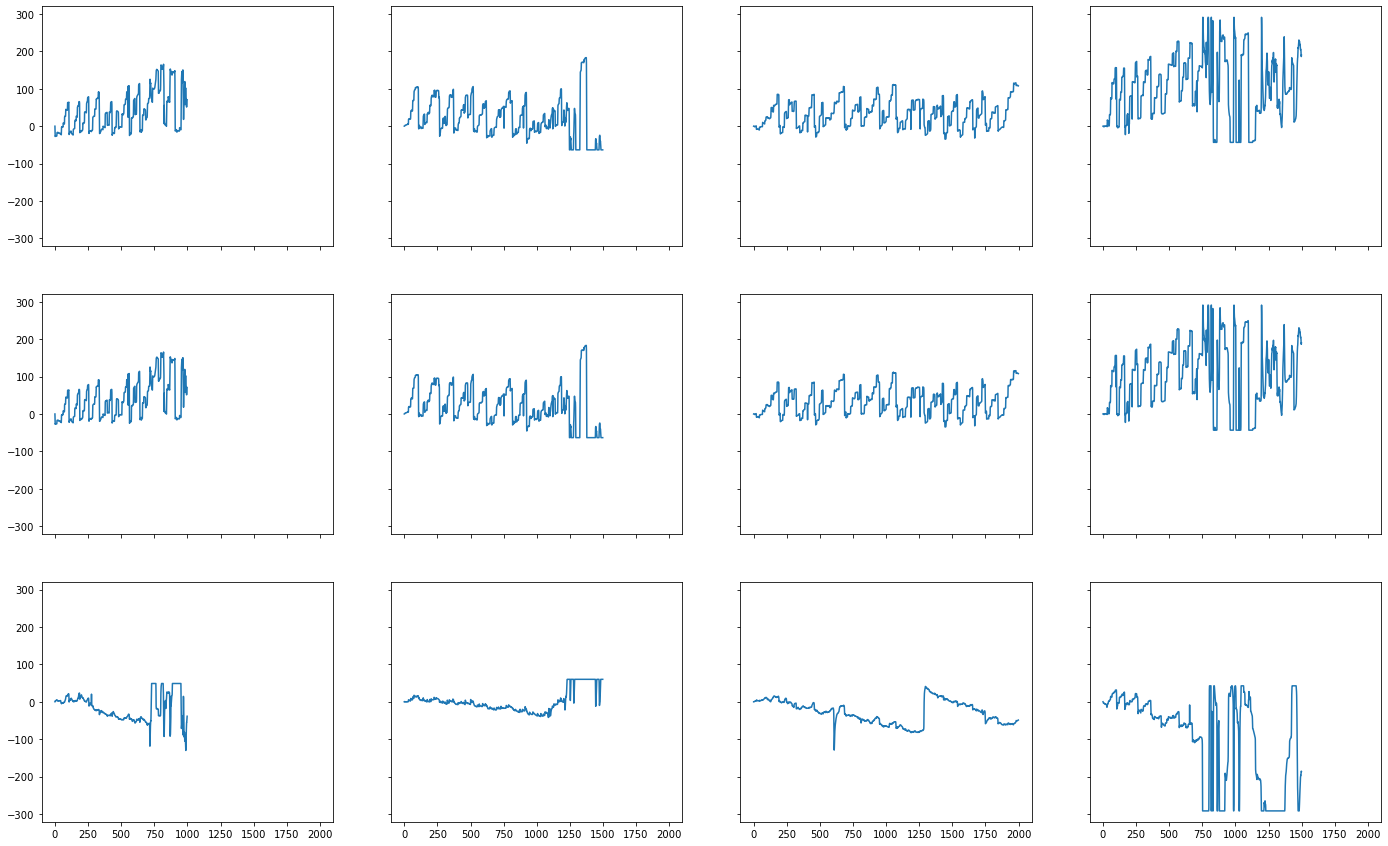

In [33]:
fig,axs = plt.subplots(3,4, figsize =(24,15),sharex =True, sharey=True)
axs[0,0].plot(C_cmx[58])
axs[0,1].plot(C_cmx[30])
axs[0,2].plot(C_cmx[86])
axs[0,3].plot(C_cmx[41])
axs[1,0].plot(C_real[58])
axs[1,1].plot(C_real[30])
axs[1,2].plot(C_real[86])
axs[1,3].plot(C_real[41])
axs[2,0].plot(C_img[58])
axs[2,1].plot(C_img[30])
axs[2,2].plot(C_img[86])
axs[2,3].plot(C_img[41])

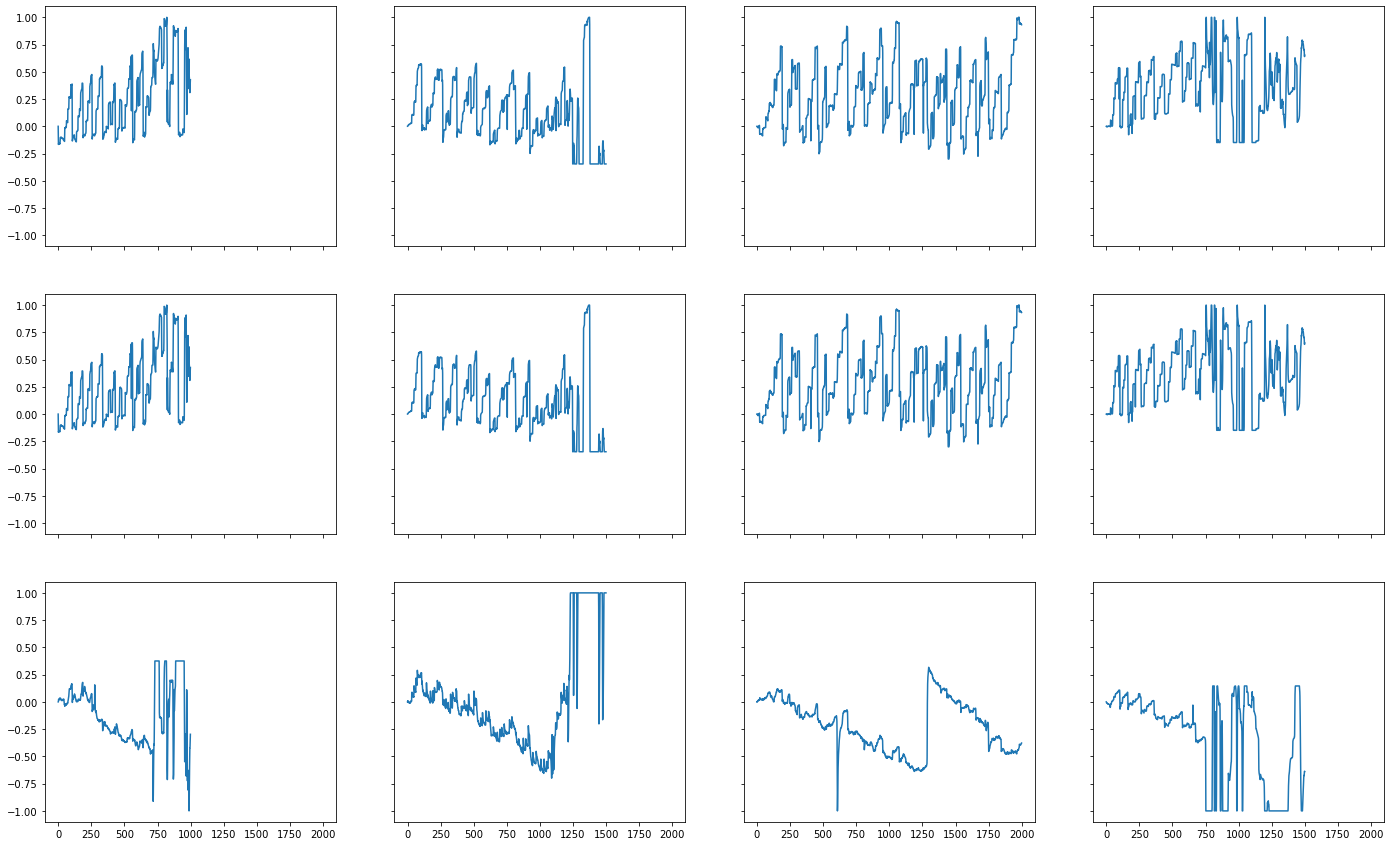

In [29]:
fig,axs = plt.subplots(3,4, figsize =(24,15),sharex =True, sharey=True)
axs[0,0].plot(C_cmx[58])
axs[0,1].plot(C_cmx[30])
axs[0,2].plot(C_cmx[86])
axs[0,3].plot(C_cmx[41])
axs[1,0].plot(C_real[58])
axs[1,1].plot(C_real[30])
axs[1,2].plot(C_real[86])
axs[1,3].plot(C_real[41])
axs[2,0].plot(C_img[58])
axs[2,1].plot(C_img[30])
axs[2,2].plot(C_img[86])
axs[2,3].plot(C_img[41])

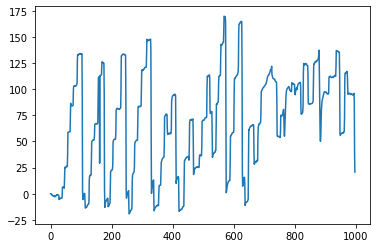

In [6]:
plt.plot(C_real[35])

In [ ]:
####TRIAL CELL###
## 63,5,17,12,1
data = C_real[63]
L= len(data)+1
k = int((len(data) + 1)/250) # k varies from 4 to 8
N=20
w = 2179771190523333/(L-1)
B  = L/50
E =B/5#round((N*B - L)/(N-1))
print(k)
print(w)
print(L)
max(np.abs(data))

In [30]:
def stft_run(n_ratio,o_ratio,nf):
    C_spec = []
    for j in range(len(tmat)):
        data = tmat[j]
        L= len(data)+1
        k = int((len(data) + 1)/250) # k varies from 4 to 8
        N=20
        B  = L/n_ratio
        E =B/o_ratio#round((N*B - L)/(N-1))
        f, t, Zxx = signal.stft(tmat[j],fs= L/250, nperseg=B,noverlap= E,nfft=nf)
        
        C_spec.append(np.abs(Zxx)**2)
    
    vec = []
    for i in range(len(C_spec)):
        vec.append(C_spec[i])
    #print(C_spec[i].shape)
    
    for i in range(len(C_spec)):
        vec[i]=vec[i].flatten()
    
    

    return vec

In [31]:
def kmeans(vec, alabels):
    kmeans = KMeans(n_clusters = 2, random_state=0).fit(vec)
    predicted_labels = kmeans.labels_
    actual_labels = alabels
    
    conf_m = confusion_matrix(actual_labels,predicted_labels)[:2]
    acc = accuracy_score(actual_labels,predicted_labels)*100
    
    return conf_m, acc

In [ ]:
np.concatenate((np.ones(88), np.zeros(97)))

In [32]:
def return_sq_im(buckets, size):    
    matrix = np.empty(size)    
    for a in range(size[0]):
        for b in range(size[1]):
            m = buckets[a]
            n = buckets[b]

            dis = eu([m], [n])
            matrix[a][b] = dis 

    mx = np.amax(matrix)
    img = matrix/mx  
    img = img*256
    
    return matrix

In [33]:
def return_sq_im_cos(buckets, size):    
    matrix = np.empty(size)    
    for a in range(size[0]):
        for b in range(size[1]):
            m = buckets[a]
            n = buckets[b]

            dis = cosine([m], [n])
            matrix[a][b] = dis 

    mx = np.amax(matrix)
    img = matrix/mx  
    img = img*256
    
    return matrix

In [ ]:
def return_sq_im_cos(buckets, size):    
    matrix = np.empty(size)    
    for a in range(size[0]):
        for b in range(size[1]):
            m = buckets[a]
            n = buckets[b]

            dis = cosine([m], [n])
            matrix[a][b] = dis 

    mx = np.amax(matrix)
    img = matrix/mx  
    img = img*256
    
    return matrix

In [34]:
def return_sq_im_min(buckets, size):    
    matrix = np.empty(size)    
    for a in range(size[0]):
        for b in range(size[1]):
            m = buckets[a]
            n = buckets[b]

            dis = mink([m], [n],p=1)
            matrix[a][b] = dis 

    mx = np.amax(matrix)
    img = matrix/mx  
    img = img*256
    
    return matrix

In [35]:
def disp_mat(vec):
    mat = return_sq_im(vec)
    mx =mat /np.amax(mat)
    im =mx*256
    plt.imshow(im, cmap='gray', vmin=0, vmax=256)
    plt.show()

In [36]:
def disp_im_mat(mat):
    mx =mat /np.amax(mat)
    im =mx*256
    plt.imshow(im, cmap='gray', vmin=0, vmax=256)
    plt.show()

In [37]:
def wavelet():
    C_spec = []
    for j in range(len(tmat)):
        data = tmat[j]
        L= len(data)+1
        k = int((len(data) + 1)/250) # k varies from 4 to 8
        N=20
        w = 10*840/k
        #B  = L/n_ratio
        #E =B/o_ratio#round((N*B - L)/(N-1))
        widths = np.arange(1,w+1)
        cwtmatr = signal.cwt(data, signal.ricker, widths)
        C_spec.append(np.abs(cwtmatr))
    
    vec = []
    for i in range(len(C_spec)):
        vec.append(C_spec[i])
    #print(C_spec[i].shape)
    
    for i in range(len(C_spec)):
        vec[i]=vec[i].flatten()
    
    

    return vec

In [38]:
def fetch_tmat(a,b,c):
    tmat=[]
    if(a==0):
        if(b==0):
            for i in C_indx_sort[c]:
                tmat.append(C_cmx[i])
        elif(b==1):
            for i in C_indx_sort[c]:
                tmat.append(C_real[i])
        elif(b==1):
            for i in C_indx_sort[c]:
                tmat.append(C_img[i])
    elif(a==1):
        if(b==0):
            tmat=[]
            for i in D_indx_sort[c]:
                tmat.append(D_cmx[i])
        elif(b==1):
            for i in D_indx_sort[c]:
                tmat.append(D_real[i])
        elif(b==1):
            for i in D_indx_sort[c]:
                tmat.append(D_img[i])
    retvec =tmat
    return retvec

In [ ]:
kmeans(vec, actual_labels)

In [16]:
tmat = C_cmx

In [33]:
len(D_cmx)

98

In [70]:
D_indx_sort

[[],
 [],
 [75, 76],
 [],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97]]

In [32]:
dis_C_cmx = return_sq_im(vec,[88,88])

In [39]:
C_one =[]
C_two=[]
C_three=[]
C_four = []
C_five =[]
for i in range(88):
    if (len(C_cmx[i])==999):
        C_one.append(i)
    elif (len(C_cmx[i])==1249):
        C_two.append(i)
    elif (len(C_cmx[i])==1499):
        C_three.append(i)
    elif (len(C_cmx[i])==1749):
        C_four.append(i)
    elif (len(C_cmx[i])==1999):
        C_five.append(i)
C_indx_sort = [C_one,C_two,C_three,C_four,C_five]

In [40]:
D_one =[]
D_two=[]
D_three=[]
D_four = []
D_five =[]
for i in range(98):
    if (len(D_cmx[i])==999):
        D_one.append(i)
    elif (len(D_cmx[i])==1249):
        D_two.append(i)
    elif (len(D_cmx[i])==1499):
        D_three.append(i)
    elif (len(D_cmx[i])==1749):
        D_four.append(i)
    elif (len(D_cmx[i])==1999):
        D_five.append(i)
D_indx_sort = [D_one,D_two,D_three,D_four,D_five]

In [41]:
fetch_tmat(1,0,0)

[]

[]

In [42]:
distances =[]
tmat = C_cmx
vec = stft_run(125,2,400)
dis_C_cmx = return_sq_im(vec,[88,88])
distances.append(dis_C_cmx)
tmat = C_real
vec = stft_run(125,2,400)
dis_C_real = return_sq_im(vec,[88,88])
distances.append(dis_C_real)
tmat = C_img
vec = stft_run(125,2,400)
dis_C_img = return_sq_im(vec,[88,88])
distances.append(dis_C_img)

tmat = D_cmx
vec = stft_run(125,2,400)
dis_D_cmx = return_sq_im(vec,[98,98])
distances.append(dis_D_cmx)
tmat = D_real
vec = stft_run(125,2,400)
dis_D_real = return_sq_im(vec,[98,98])
distances.append(dis_D_real)
tmat = D_img
vec = stft_run(125,2,400)
dis_D_img = return_sq_im(vec,[98,98])
distances.append(dis_D_img)





C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


In [53]:
max_array=[]
for data in distances:
    for x in data:
        max_array.append(max(x))
maxval = max(max_array)

In [55]:
maxval = max(max_array)

In [56]:
for data in distances:
    for x in data:
        x = x/maxval

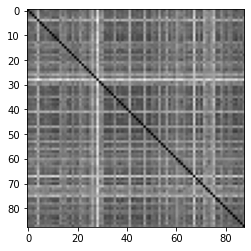

Mean: 37.895919140379036
Standard Deviation: 11.080102665578345
Max: 80.3910493005012


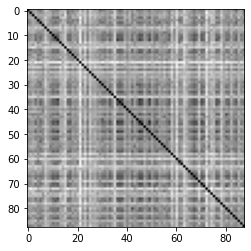

Mean: 18.485800059888103
Standard Deviation: 4.353452931893195
Max: 29.98940610032487


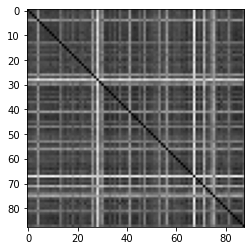

Mean: 17.285519630146993
Standard Deviation: 8.277308328583516
Max: 48.20503813425679


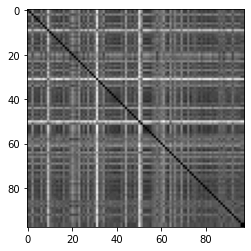

Mean: 35.38120747281818
Standard Deviation: 12.963529878085764
Max: 92.06707460689047


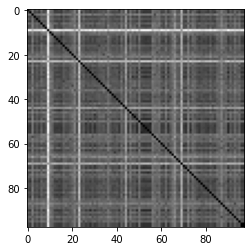

Mean: 18.918762566996346
Standard Deviation: 6.464533570101519
Max: 49.06657328376725


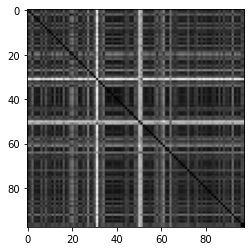

Mean: 15.059840667033352
Standard Deviation: 9.513091429359243
Max: 57.8721940419406


In [57]:

for i in distances:
    disp_im_mat(i)
    print("Mean:",np.mean(i))
    print("Standard Deviation:", np.std(i))
    print("Max:", np.amax(i))

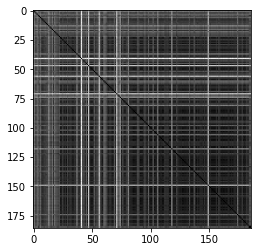

Mean: 1414378.0368243756
Standard Deviation: 913849.0398562911
Max: 5358298.926230587


In [102]:
tmat=[]
for i in range(88):
    tmat.append(C_cmx[i])
for i in range(98):
    tmat.append(D_cmx[i])

vec = stft_run(125,2,400)
dis_tot = return_sq_im(vec,[186,186])
disp_im_mat(dis_tot)
print("Mean:",np.mean(dis_tot))
print("Standard Deviation:", np.std(dis_tot))
print("Max:", np.amax(dis_tot))

In [79]:
dist_sort =[]

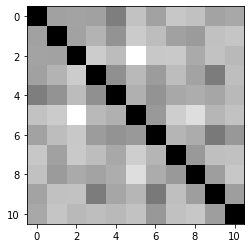

Mean: 37.14272013590518
Standard Deviation: 12.905675856589584
Max: 59.26449921401901


In [80]:
#C_cmx, 999
tmat = fetch_tmat(0,0,0)
vec = stft_run(125,2,400)
dis_temp = return_sq_im(vec,[len(tmat),len(tmat)])
dist_sort.append(dis_temp)
disp_im_mat(dis_temp)
print("Mean:",np.mean(dis_temp))
print("Standard Deviation:", np.std(dis_temp))
print("Max:", np.amax(dis_temp))

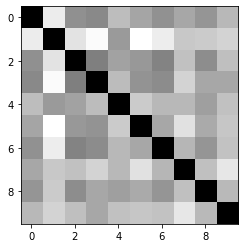

Mean: 38.15178585833602
Standard Deviation: 14.591432556856025
Max: 59.46636351408146


In [81]:
#C_cmx, 1249
tmat = fetch_tmat(0,0,1)
vec = stft_run(125,2,400)
dis_temp = return_sq_im(vec,[len(tmat),len(tmat)])
dist_sort.append(dis_temp)
disp_im_mat(dis_temp)

print("Mean:",np.mean(dis_temp))
print("Standard Deviation:", np.std(dis_temp))
print("Max:", np.amax(dis_temp))

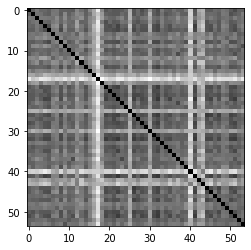

Mean: 36.8952699543413
Standard Deviation: 12.58382079815801
Max: 77.22650342617254


In [82]:
#C_cmx, 1499
tmat = fetch_tmat(0,0,2)
vec = stft_run(125,2,400)
dis_temp = return_sq_im(vec,[len(tmat),len(tmat)])
dist_sort.append(dis_temp)
disp_im_mat(dis_temp)
print("Mean:",np.mean(dis_temp))
print("Standard Deviation:", np.std(dis_temp))
print("Max:", np.amax(dis_temp))

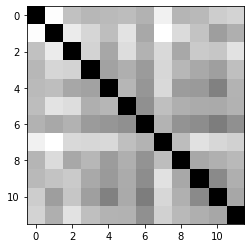

Mean: 26.225216444140692
Standard Deviation: 8.980133073117345
Max: 39.43405283403679


In [83]:
#C_cmx, 1999
tmat = fetch_tmat(0,0,4)
vec = stft_run(125,2,400)
dis_temp = return_sq_im(vec,[len(tmat),len(tmat)])
dist_sort.append(dis_temp)
disp_im_mat(dis_temp)
print("Mean:",np.mean(dis_temp))
print("Standard Deviation:", np.std(dis_temp))
print("Max:", np.amax(dis_temp))

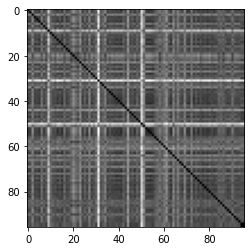

Mean: 35.440324318733204
Standard Deviation: 13.091303698494569
Max: 92.06707460689047


In [85]:
#D_cmx, 1999
tmat = fetch_tmat(1,0,4)
vec = stft_run(125,2,400)
dis_temp = return_sq_im(vec,[len(tmat),len(tmat)])
dist_sort.append(dis_temp)
disp_im_mat(dis_temp)
print("Mean:",np.mean(dis_temp))
print("Standard Deviation:", np.std(dis_temp))
print("Max:", np.amax(dis_temp))

In [86]:
max_array=[]
for data in dist_sort:
    for x in data:
        max_array.append(max(x))
maxval = max(max_array)

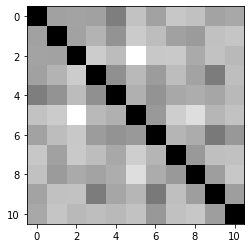

Mean: 37.14272013590518
Standard Deviation: 12.905675856589584
Max: 59.26449921401901


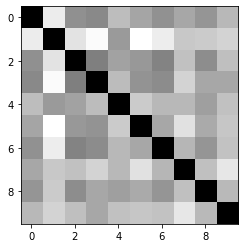

Mean: 38.15178585833602
Standard Deviation: 14.591432556856025
Max: 59.46636351408146


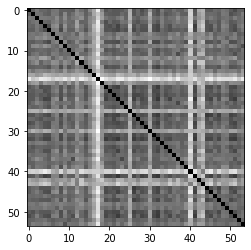

Mean: 36.8952699543413
Standard Deviation: 12.58382079815801
Max: 77.22650342617254


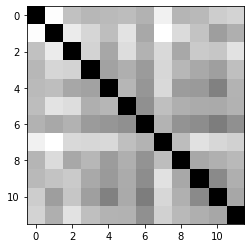

Mean: 26.225216444140692
Standard Deviation: 8.980133073117345
Max: 39.43405283403679


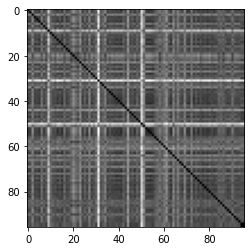

Mean: 35.440324318733204
Standard Deviation: 13.091303698494569
Max: 92.06707460689047


In [87]:
for data in dist_sort:
    for x in data:
        x = x/maxval
for i in dist_sort:
    disp_im_mat(i)
    print("Mean:",np.mean(i))
    print("Standard Deviation:", np.std(i))
    print("Max:", np.amax(i))

In [88]:
distances_cos =[]
tmat = C_cmx
vec = stft_run(125,2,400)
dis_C_cmx = return_sq_im_cos(vec,[88,88])
distances_cos.append(dis_C_cmx)
tmat = C_real
vec = stft_run(125,2,400)
dis_C_real = return_sq_im_cos(vec,[88,88])
distances_cos.append(dis_C_real)
tmat = C_img
vec = stft_run(125,2,400)
dis_C_img = return_sq_im_cos(vec,[88,88])
distances_cos.append(dis_C_img)

tmat = D_cmx
vec = stft_run(125,2,400)
dis_D_cmx = return_sq_im_cos(vec,[98,98])
distances_cos.append(dis_D_cmx)
tmat = D_real
vec = stft_run(125,2,400)
dis_D_real = return_sq_im_cos(vec,[98,98])
distances_cos.append(dis_D_real)
tmat = D_img
vec = stft_run(125,2,400)
dis_D_img = return_sq_im_cos(vec,[98,98])
distances_cos.append(dis_D_img)





In [89]:
max_array=[]
for data in distances_cos:
    for x in data:
        max_array.append(max(x))
maxval = max(max_array)
for data in distances_cos:
    for x in data:
        x = x/maxval

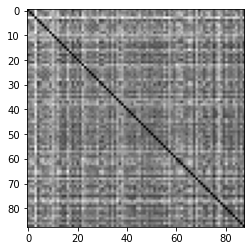

Mean: 0.4415068458088378
Standard Deviation: 0.12316410535574618
Max: 0.8582545054983648


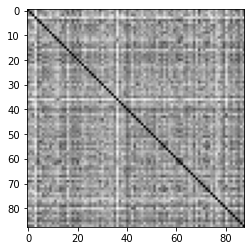

Mean: 0.5769107208788197
Standard Deviation: 0.136203247361117
Max: 0.9550496296000026


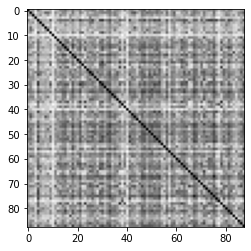

Mean: 0.5872859428058291
Standard Deviation: 0.16636394705331564
Max: 0.975699515563479


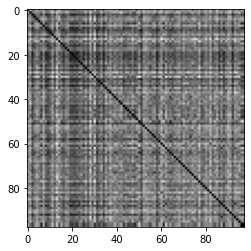

Mean: 0.3878458276838689
Standard Deviation: 0.12642380362655853
Max: 0.8439622029520164


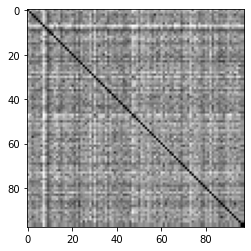

Mean: 0.5435178290149706
Standard Deviation: 0.1311426015093005
Max: 0.9529159018246905


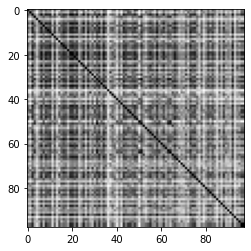

Mean: 0.5093717596846535
Standard Deviation: 0.20696564011244847
Max: 0.9738801867062414


In [90]:
for i in distances_cos:
    disp_im_mat(i)
    print("Mean:",np.mean(i))
    print("Standard Deviation:", np.std(i))
    print("Max:", np.amax(i))

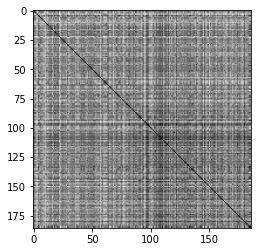

Mean: 0.46561054103442756
Standard Deviation: 0.1255167115356727
Max: 0.892023213602048


In [114]:
tmat=[]
for i in range(88):
    tmat.append(C_cmx[i])
for i in range(98):
    tmat.append(D_cmx[i])

vec = stft_run(125,2,400)
dis_tot = return_sq_im_cos(vec,[186,186])
disp_im_mat(dis_tot)
print("Mean:",np.mean(dis_tot))
print("Standard Deviation:", np.std(dis_tot))
print("Max:", np.amax(dis_tot))

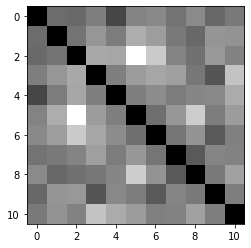

Mean: 0.36706545384152267
Standard Deviation: 0.14600710005879233
Max: 0.7506988520574163


In [115]:
#C_cmx, 999
tmat = fetch_tmat(0,0,0)
vec = stft_run(125,2,400)
dis_temp = return_sq_im_cos(vec,[len(tmat),len(tmat)])
disp_im_mat(dis_temp)
print("Mean:",np.mean(dis_temp))
print("Standard Deviation:", np.std(dis_temp))
print("Max:", np.amax(dis_temp))

2